In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data=pd.read_csv("top_50_book_amazom.csv")
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


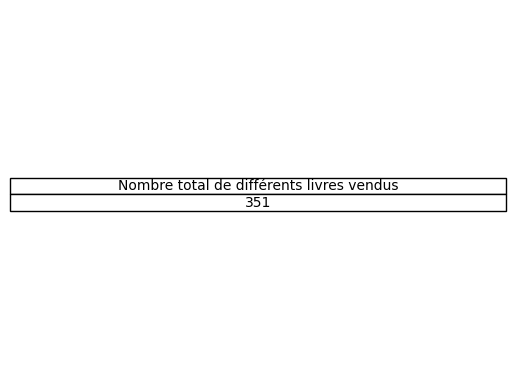

In [20]:
#Nombre total de différents livres vendus
nb_total_unique=data['Name'].nunique()
fig, ax = plt.subplots()
ax.axis('off')
ax.table(cellText=[[nb_total_unique]], colLabels=['Nombre total de différents livres vendus'], cellLoc='center', loc='center')
plt.show()

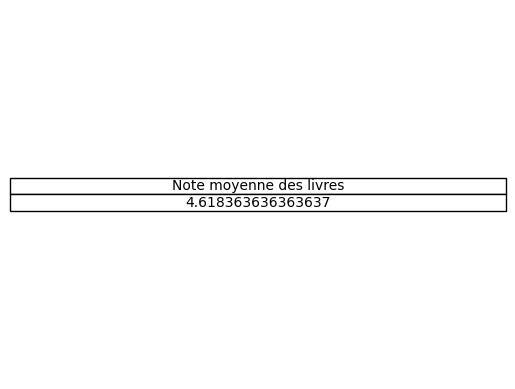

In [21]:
#Note moyenne des livres
note_moy_livre=data['User Rating'].mean()
fig, ax = plt.subplots()
ax.axis('off')
ax.table(cellText=[[note_moy_livre]], colLabels=['Note moyenne des livres'], cellLoc='center', loc='center')
plt.show()

In [22]:
from pandasql import sqldf

#query = "select Name,AVG('User Rating') as moyenne_par_livre from data group by Name;"
#result = sqldf(query)

#print(result)

In [23]:
#note moyenne par livre
note_moy_par_livre=data.groupby('Name')['User Rating'].mean()
print(note_moy_par_livre)

Name
10-Day Green Smoothie Cleanse                                                             4.7
11/22/63: A Novel                                                                         4.6
12 Rules for Life: An Antidote to Chaos                                                   4.7
1984 (Signet Classics)                                                                    4.7
5,000 Awesome Facts (About Everything!) (National Geographic Kids)                        4.8
                                                                                         ... 
Winter of the World: Book Two of the Century Trilogy                                      4.5
Women Food and God: An Unexpected Path to Almost Everything                               4.2
Wonder                                                                                    4.8
Wrecking Ball (Diary of a Wimpy Kid Book 14)                                              4.9
You Are a Badass: How to Stop Doubting Your Greatness a

In [24]:
# Répartition du nombre de critiques reçus par les livres 
nb_critique_par_livre=data.groupby('Name')['Reviews'].sum()
print(nb_critique_par_livre)

Name
10-Day Green Smoothie Cleanse                                                              17350
11/22/63: A Novel                                                                           2052
12 Rules for Life: An Antidote to Chaos                                                    18979
1984 (Signet Classics)                                                                     21424
5,000 Awesome Facts (About Everything!) (National Geographic Kids)                          7665
                                                                                           ...  
Winter of the World: Book Two of the Century Trilogy                                       10760
Women Food and God: An Unexpected Path to Almost Everything                                 1302
Wonder                                                                                    108125
Wrecking Ball (Diary of a Wimpy Kid Book 14)                                                9413
You Are a Badass: How to 

                                               livre  critiques
0                             The Fault in Our Stars     201928
1                          Oh, the Places You'll Go!     174672
2                                          Gone Girl     171813
3                              The Girl on the Train     158892
4  Unbroken: A World War II Story of Survival, Re...     148365


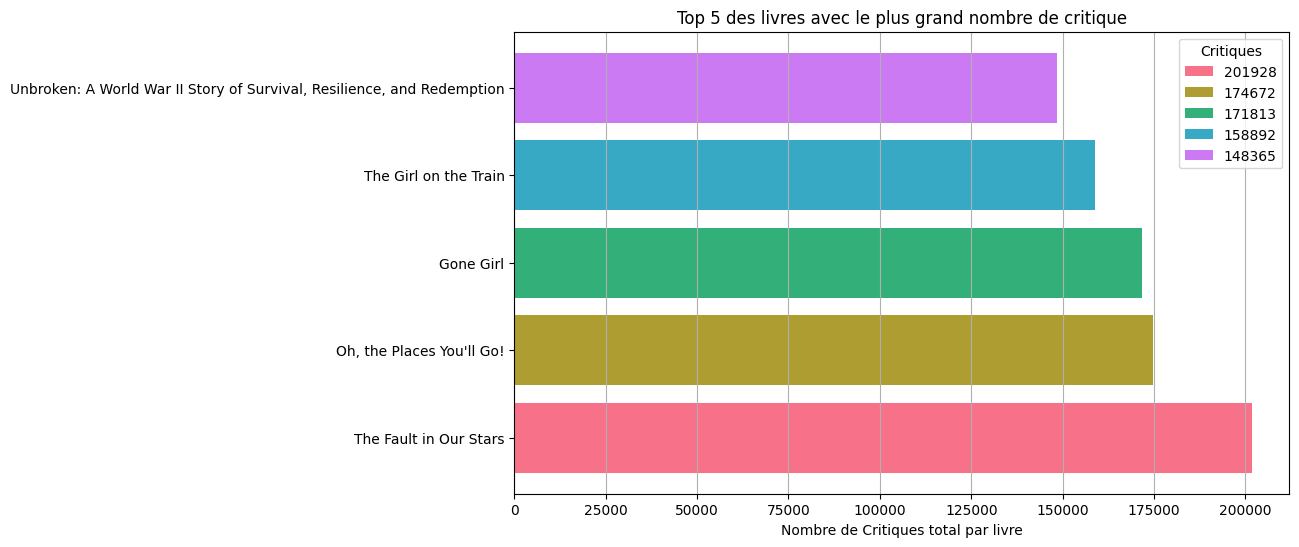

In [25]:
#Top5 avec le plus grand nombre de critique
top_5_critiques = nb_critique_par_livre.sort_values(ascending=False).head(5)
top_5_critiques = top_5_critiques.rename_axis('livre').reset_index(name='critiques')

print(top_5_critiques)

# Utiliser une palette de couleurs Seaborn
palette = sns.color_palette("husl", len(top_5_critiques['critiques']))

# Création du diagramme en bâton avec des couleurs différentes
plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_critiques['livre'], top_5_critiques['critiques'], color=palette)

# Ajouter une légende de couleur
plt.legend(bars, top_5_critiques['critiques'], title='Critiques', loc='upper right')

plt.xlabel('Nombre de Critiques total par livre')
plt.title('Top 5 des livres avec le plus grand nombre de critique')
plt.grid(axis='x')

# Afficher le diagramme
plt.show()


                                               Livre  Apparition
0  Publication Manual of the American Psychologic...          10
1                                StrengthsFinder 2.0           9
2                          Oh, the Places You'll Go!           8
3                        The Very Hungry Caterpillar           7
4  The 7 Habits of Highly Effective People: Power...           7


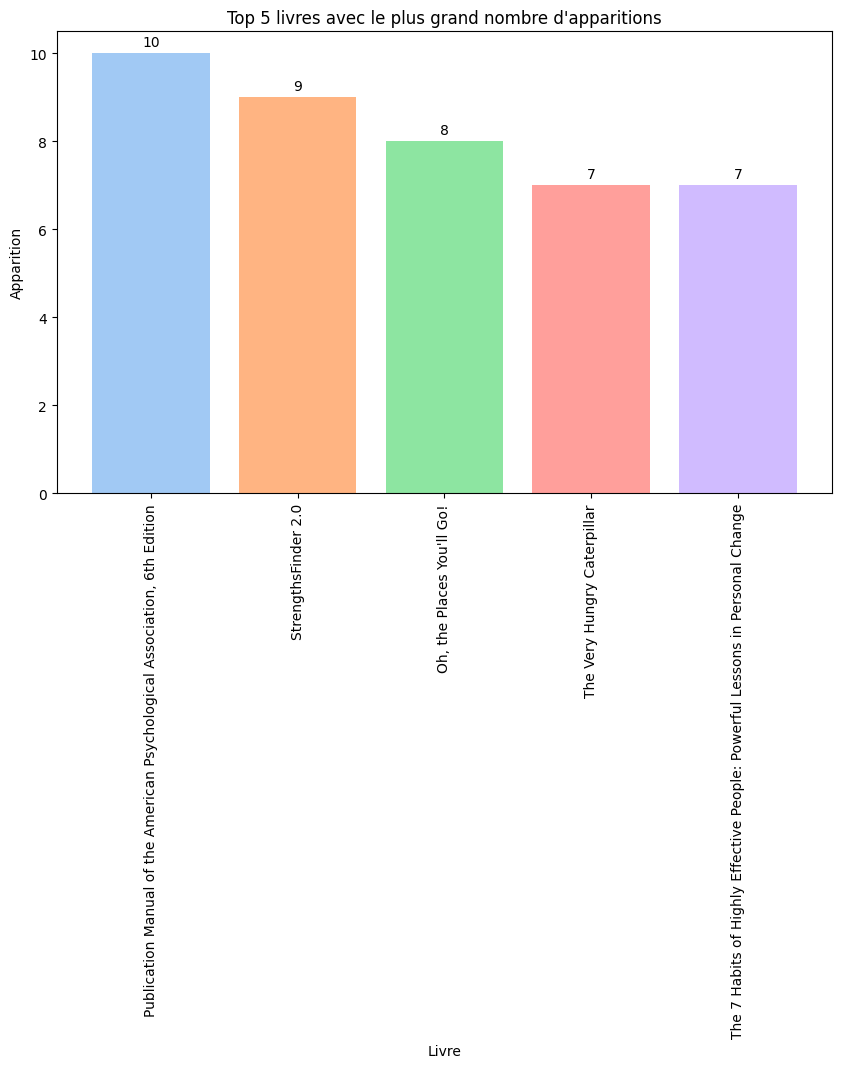

In [26]:
# top 5 livre avec le plus grand Nombre d'apparition
nb_apparition_livre=data['Name'].value_counts().sort_values(ascending=False).head(5)

nb_apparition_livre = nb_apparition_livre.rename_axis('Livre').reset_index(name='Apparition')
print(nb_apparition_livre)

palette = sns.color_palette("pastel")[:len(nb_apparition_livre)]
plt.figure(figsize=(10, 6))
bars = plt.bar(nb_apparition_livre['Livre'], nb_apparition_livre['Apparition'], color=palette)
plt.title('Top 5 livres avec le plus grand nombre d\'apparitions')
plt.xlabel('Livre')
plt.ylabel('Apparition')

plt.xticks(rotation=90)

for bar, apparition in zip(bars, nb_apparition_livre['Apparition']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(apparition), ha='center', va='bottom', rotation=0)

plt.show()

Name
Publication Manual of the American Psychological Association, 6th Edition    460
Name: Price, dtype: int64


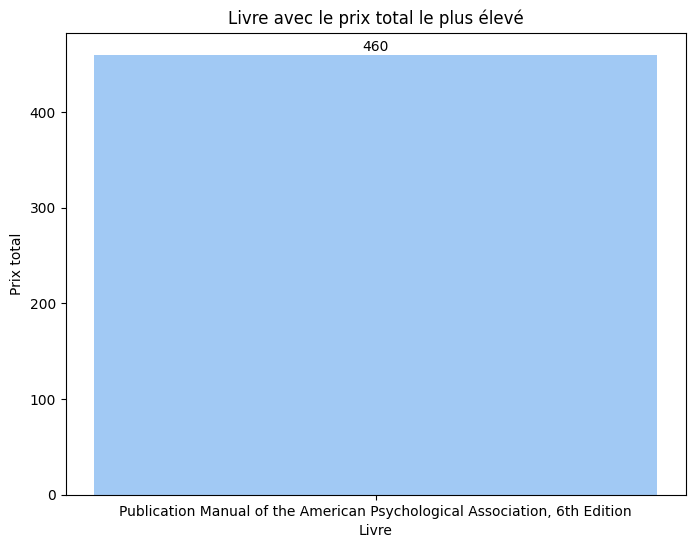

In [27]:
# livre avec le prix le plus élevé 
livre_prix_eleve=data.groupby('Name')['Price'].sum().sort_values(ascending=False).head(1)
print(livre_prix_eleve)
palette = sns.color_palette("pastel")

# Créer le diagramme à barres pour visualiser la valeur
plt.figure(figsize=(8, 6))
bar = plt.bar(livre_prix_eleve.index, livre_prix_eleve.values, color=palette)
plt.title('Livre avec le prix total le plus élevé')
plt.xlabel('Livre')
plt.ylabel('Prix total')

# Ajouter la valeur au-dessus de la barre
for b in bar:
    plt.text(b.get_x() + b.get_width() / 2, b.get_height() + 0.5, str(b.get_height()), ha='center', va='bottom')

plt.show()

-0.1330862872808798


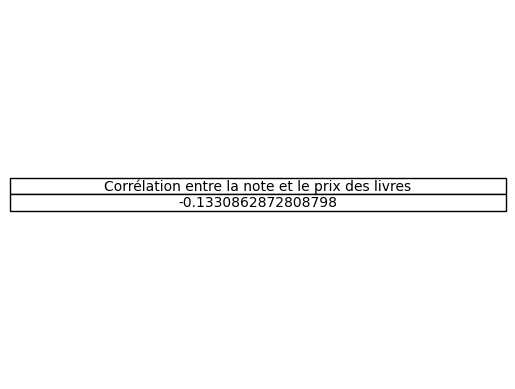

In [28]:
#Quelle est la corrélation entre la note et le prix des livres ?

correlation = data['User Rating'].corr(data['Price'])
print(correlation)
fig, ax = plt.subplots()
ax.axis('off')
ax.table(cellText=[[correlation]], colLabels=['Corrélation entre la note et le prix des livres'], cellLoc='center', loc='center')
plt.show()

In [29]:
#Nombre d'apparition de chaque livre
different_livre=data['Name'].value_counts()
print(different_livre)

Name
Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The Very Hungry Caterpillar                                                      7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
                                                                                ..
Humans of New York : Stories                                                     1
Howard Stern Comes Again                                                         1
Homebody: A Guide to Creating Spaces You Never Want to Leave                     1
Have a Little Faith: A True Story                                                1
Night (Night)                                                                    1
Name: count, Length: 351, dtype: int64


Premier élément de chaque groupe :
          Genre  repartion
0  Non Fiction        191
1      Fiction        160


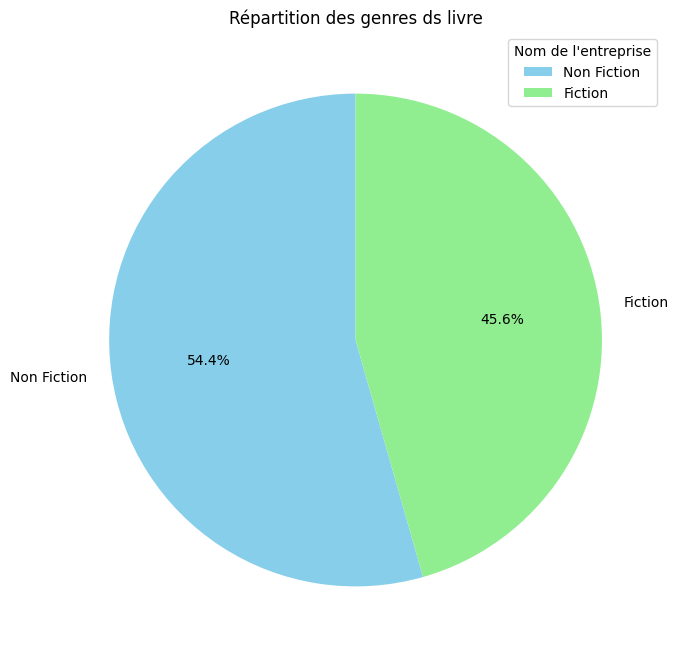

In [30]:
#Quelle est la répartition des genres des livre
repartition_genre=data.groupby('Name').first()['Genre'].value_counts()
repartition_genre = repartition_genre.rename_axis('Genre').reset_index(name='repartion')
print("Premier élément de chaque groupe :\n", repartition_genre)
# Création du diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(repartition_genre['repartion'], labels=repartition_genre['Genre'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])

# Ajouter un titre
plt.title('Répartition des genres ds livre')
# Ajouter une légende
plt.legend(repartition_genre['Genre'], title='Nom de l\'entreprise', loc='upper right')
# Afficher le diagramme
plt.show()


    Année  nombre_critique_total
0    2009                 235506
1    2010                 273981
2    2011                 405041
3    2012                 654546
4    2013                 654907
5    2014                 792997
6    2015                 711669
7    2016                 709800
8    2017                 644420
9    2018                 696521
10   2019                 794917


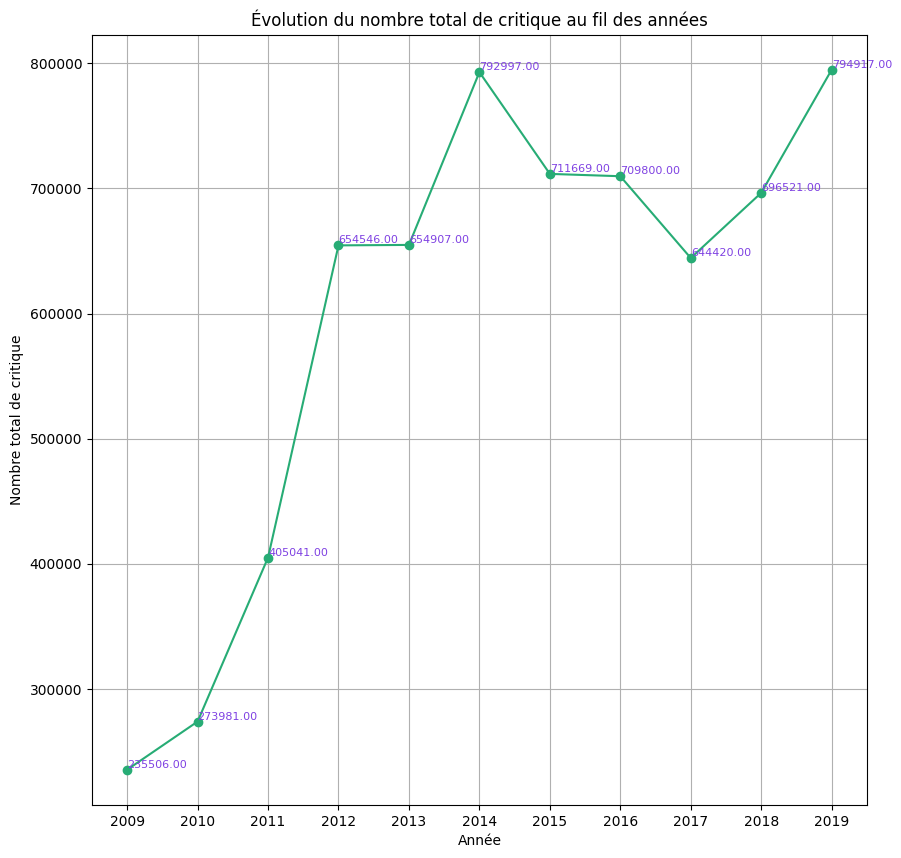

In [31]:
#Evolution des critiques totales en fonction d'année
nb_critique_par_année=data.groupby('Year')['Reviews'].sum()
nb_critique_par_année =nb_critique_par_année.rename_axis('Année').reset_index(name='nombre_critique_total')
print(nb_critique_par_année)
plt.figure(figsize=(10, 10))
plt.plot(nb_critique_par_année['Année'], nb_critique_par_année['nombre_critique_total'], marker='o', linestyle='-', color='#27AC75')

plt.title('Évolution du nombre total de critique au fil des années')
plt.xlabel('Année')
plt.ylabel('Nombre total de critique')
plt.xticks(nb_critique_par_année['Année'])
for i, txt in enumerate(nb_critique_par_année['nombre_critique_total']):
    plt.text(nb_critique_par_année['Année'][i], txt, f"{txt:.2f}", ha='left', va='bottom', fontsize=8,color='#7F41E2')

plt.grid(True)
plt.show()


    Année  nombre_note_moyenne
0    2009                4.584
1    2010                4.558
2    2011                4.558
3    2012                4.532
4    2013                4.554
5    2014                4.622
6    2015                4.648
7    2016                4.678
8    2017                4.660
9    2018                4.668
10   2019                4.740


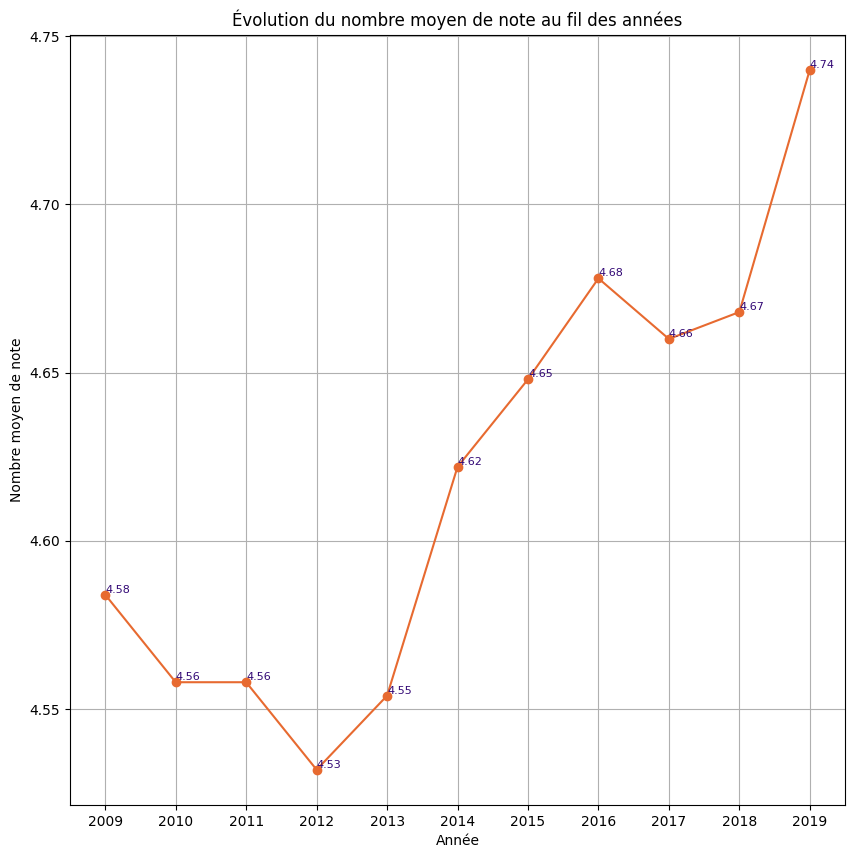

In [32]:
#Evolution des notes moyennes en fonction d'année
nb_note_par_année=data.groupby('Year')['User Rating'].mean()
nb_note_par_année =nb_note_par_année.rename_axis('Année').reset_index(name='nombre_note_moyenne')
print(nb_note_par_année)
plt.figure(figsize=(10, 10))
plt.plot(nb_note_par_année['Année'], nb_note_par_année['nombre_note_moyenne'], marker='o', linestyle='-', color='#E76A30')

plt.title('Évolution du nombre moyen de note au fil des années')
plt.xlabel('Année')
plt.ylabel('Nombre moyen de note')
plt.xticks(nb_critique_par_année['Année'])
for i, txt in enumerate(nb_note_par_année['nombre_note_moyenne']):
    plt.text(nb_note_par_année['Année'][i], txt, f"{txt:.2f}", ha='left', va='bottom', fontsize=8, color='#320875')

plt.grid(True)
plt.show()

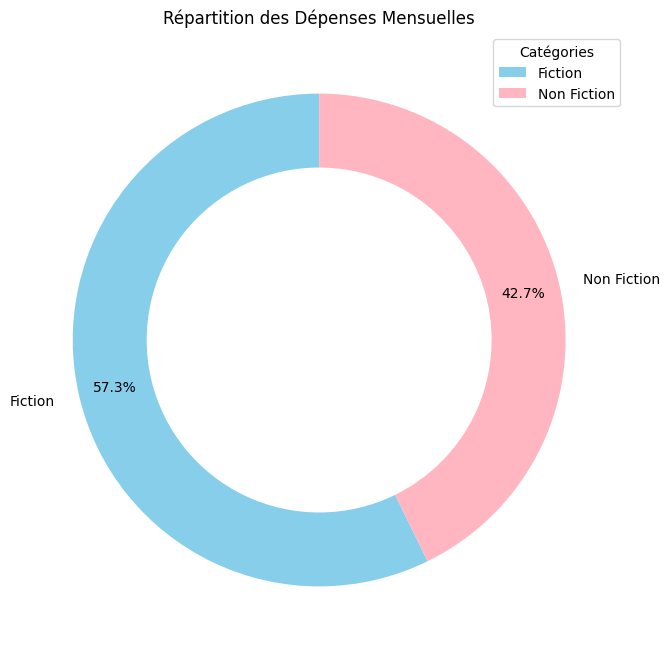

In [39]:
#Répartition de genre en fonction de nombre de critique
repartion_genre_critique=data.groupby('Genre')['Reviews'].sum()
repartion_genre_critique =repartion_genre_critique.rename_axis('Genre').reset_index(name='Reviews')
# Création du graphique en anneau
plt.figure(figsize=(8, 8))
plt.pie(repartion_genre_critique['Reviews'], labels=repartion_genre_critique['Genre'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.3), colors=['skyblue', 'lightpink'])

# Ajouter un cercle au milieu pour créer un trou
centre_cercle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_cercle)

# Ajouter une légende
plt.legend(repartion_genre_critique['Genre'], title='Catégories', loc='upper right')

# Ajouter un titre
plt.title('Répartition des Dépenses Mensuelles')

# Afficher le graphique
plt.show()